## Imports

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Dataset Analysis

In [39]:
prices_df = pd.read_csv("datasets/house_prices/csv/prices.csv")
totals_df = pd.read_csv("datasets/house_prices/csv/totals.csv")

# There's 1 row with a NaN value in the prices_df dataframe
prices_df = prices_df.fillna("*")

In [40]:
# Plot the total houses sold per year
totals_df["Total Houses Sold"] = totals_df["Total Finished Houses Sold"] + totals_df["Total Unfinished Houses Sold"]
totals_df["Total Average Price"] = (totals_df["National Average Price per m^2 of Finished Houses"] +
                                    totals_df["National Average Price per m^2 of Unfinished Houses"]) / 2

convert_range = lambda x: x.replace(" ", "").replace("€", "").split("-")

totals_df["National Average Range of Price per m^2 of Finished Houses"] = totals_df[
    "National Average Range of Price per m^2 of Finished Houses"].map(convert_range)
totals_df["National Average Range of Price per m^2 of Unfinished Houses"] = totals_df[
    "National Average Range of Price per m^2 of Unfinished Houses"].map(convert_range)

for i, row in enumerate(prices_df["m^2 price range"]):
    prices_df.at[i, "m^2 price range"] = convert_range(row) if row != "*" else "*"

for i, row in enumerate(prices_df["Unfinished Houses m^2 price range"]):
    prices_df.at[i, "Unfinished Houses m^2 price range"] = convert_range(row) if row != "*" else "*"

display(prices_df.head())
display(totals_df.head())


,Commune,Canton,Finished Houses Sold,Average price per m^2,m^2 price range,Unfinished Houses Sold,Average Unfinished Houses Price per m^2,Unfinished Houses m^2 price range,Year
0,Beaufort,Echternach,4.0,*,*,0.0,*,*,2007
1,Bech,Echternach,0.0,*,*,0.0,*,*,2007
2,Beckerich,Redange,8.0,*,*,0.0,*,*,2007
3,Berdorf,Echternach,6.0,*,*,1.0,*,*,2007
4,Bertrange,Luxembourg,21.0,3908.121,"[2829, 4720]",29.0,4575.018,"[3070, 5843]",2007


,Year,Total Finished Houses Sold,National Average Price per m^2 of Finished Houses,National Average Range of Price per m^2 of Finished Houses,Total Unfinished Houses Sold,National Average Price per m^2 of Unfinished Houses,National Average Range of Price per m^2 of Unfinished Houses,Total Houses Sold,Total Average Price
0,2007,2207.0,3507.182,"[2327, 4731]",1307.0,3945.805,"[2733, 5478]",3514.0,3726.4935
1,2008,2026.0,3578.830,"[2273, 4978]",1254.0,4203.922,"[2982, 5611]",3280.0,3891.3760
2,2009,2182.0,3488.124,"[2301, 4852]",979.0,4264.941,"[2894, 6203]",3161.0,3876.5325
3,2010,2302.0,3663.585,"[2438, 5142]",1407.0,4480.081,"[3155, 6374]",3709.0,4071.8330
4,2011,2562.0,3858.319,"[2533, 5487]",1621.0,4633.802,"[3232, 6448]",4183.0,4246.0605


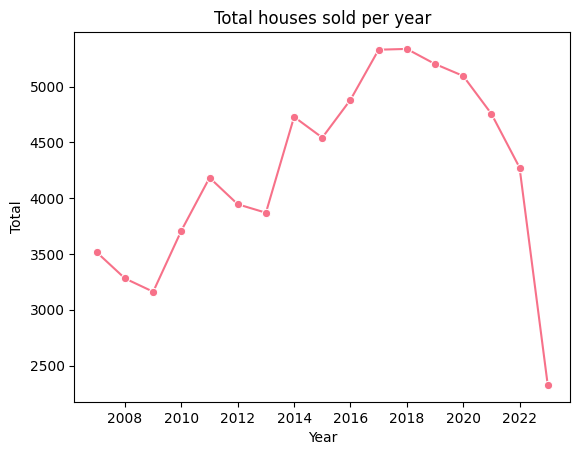

In [41]:

sns.set_palette("husl")
sns.lineplot(data=totals_df, x="Year", y="Total Houses Sold", marker="o")
plt.title("Total houses sold per year")
plt.xlabel("Year")
plt.ylabel("Total")
plt.show()

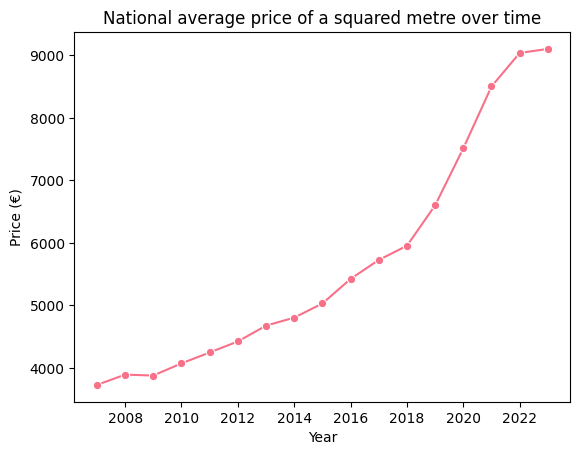

In [42]:
# Plot the national average price per m^2 of finished and unfinished houses
sns.lineplot(data=totals_df, x="Year", y="Total Average Price", marker="o")
plt.title("National average price of a squared metre over time")
plt.xlabel("Year")
plt.ylabel("Price (€)")
plt.show()


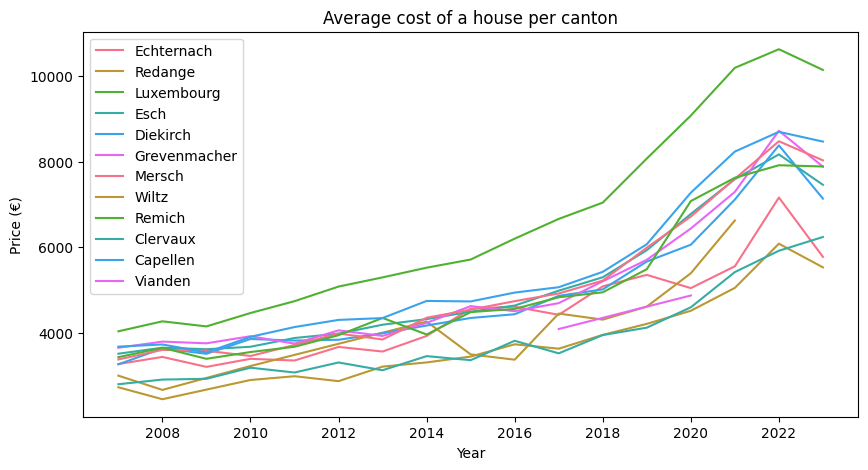

In [43]:
fig = plt.figure(figsize=(10, 5))
# Plot the average cost of a house grouped by canton
for canton in prices_df["Canton"].unique():
    canton_prices = prices_df[prices_df["Canton"] == canton]

    years = []
    cost = []

    for year in sorted(canton_prices["Year"].unique()):
        year_prices = canton_prices[canton_prices["Year"] == year]
        average_prices = []
        for row in year_prices["Average price per m^2"]:
            if row != "*":
                average_prices.append(float(row))
        for row in year_prices["Average Unfinished Houses Price per m^2"]:
            if row != "*":
                average_prices.append(float(row))
        if average_prices:
            years.append(year)
            cost.append(np.mean(average_prices))

    plt.plot(years, cost, label=canton)

plt.title("Average cost of a house per canton")
plt.xlabel("Year")
plt.ylabel("Price (€)")
plt.legend()
plt.show()


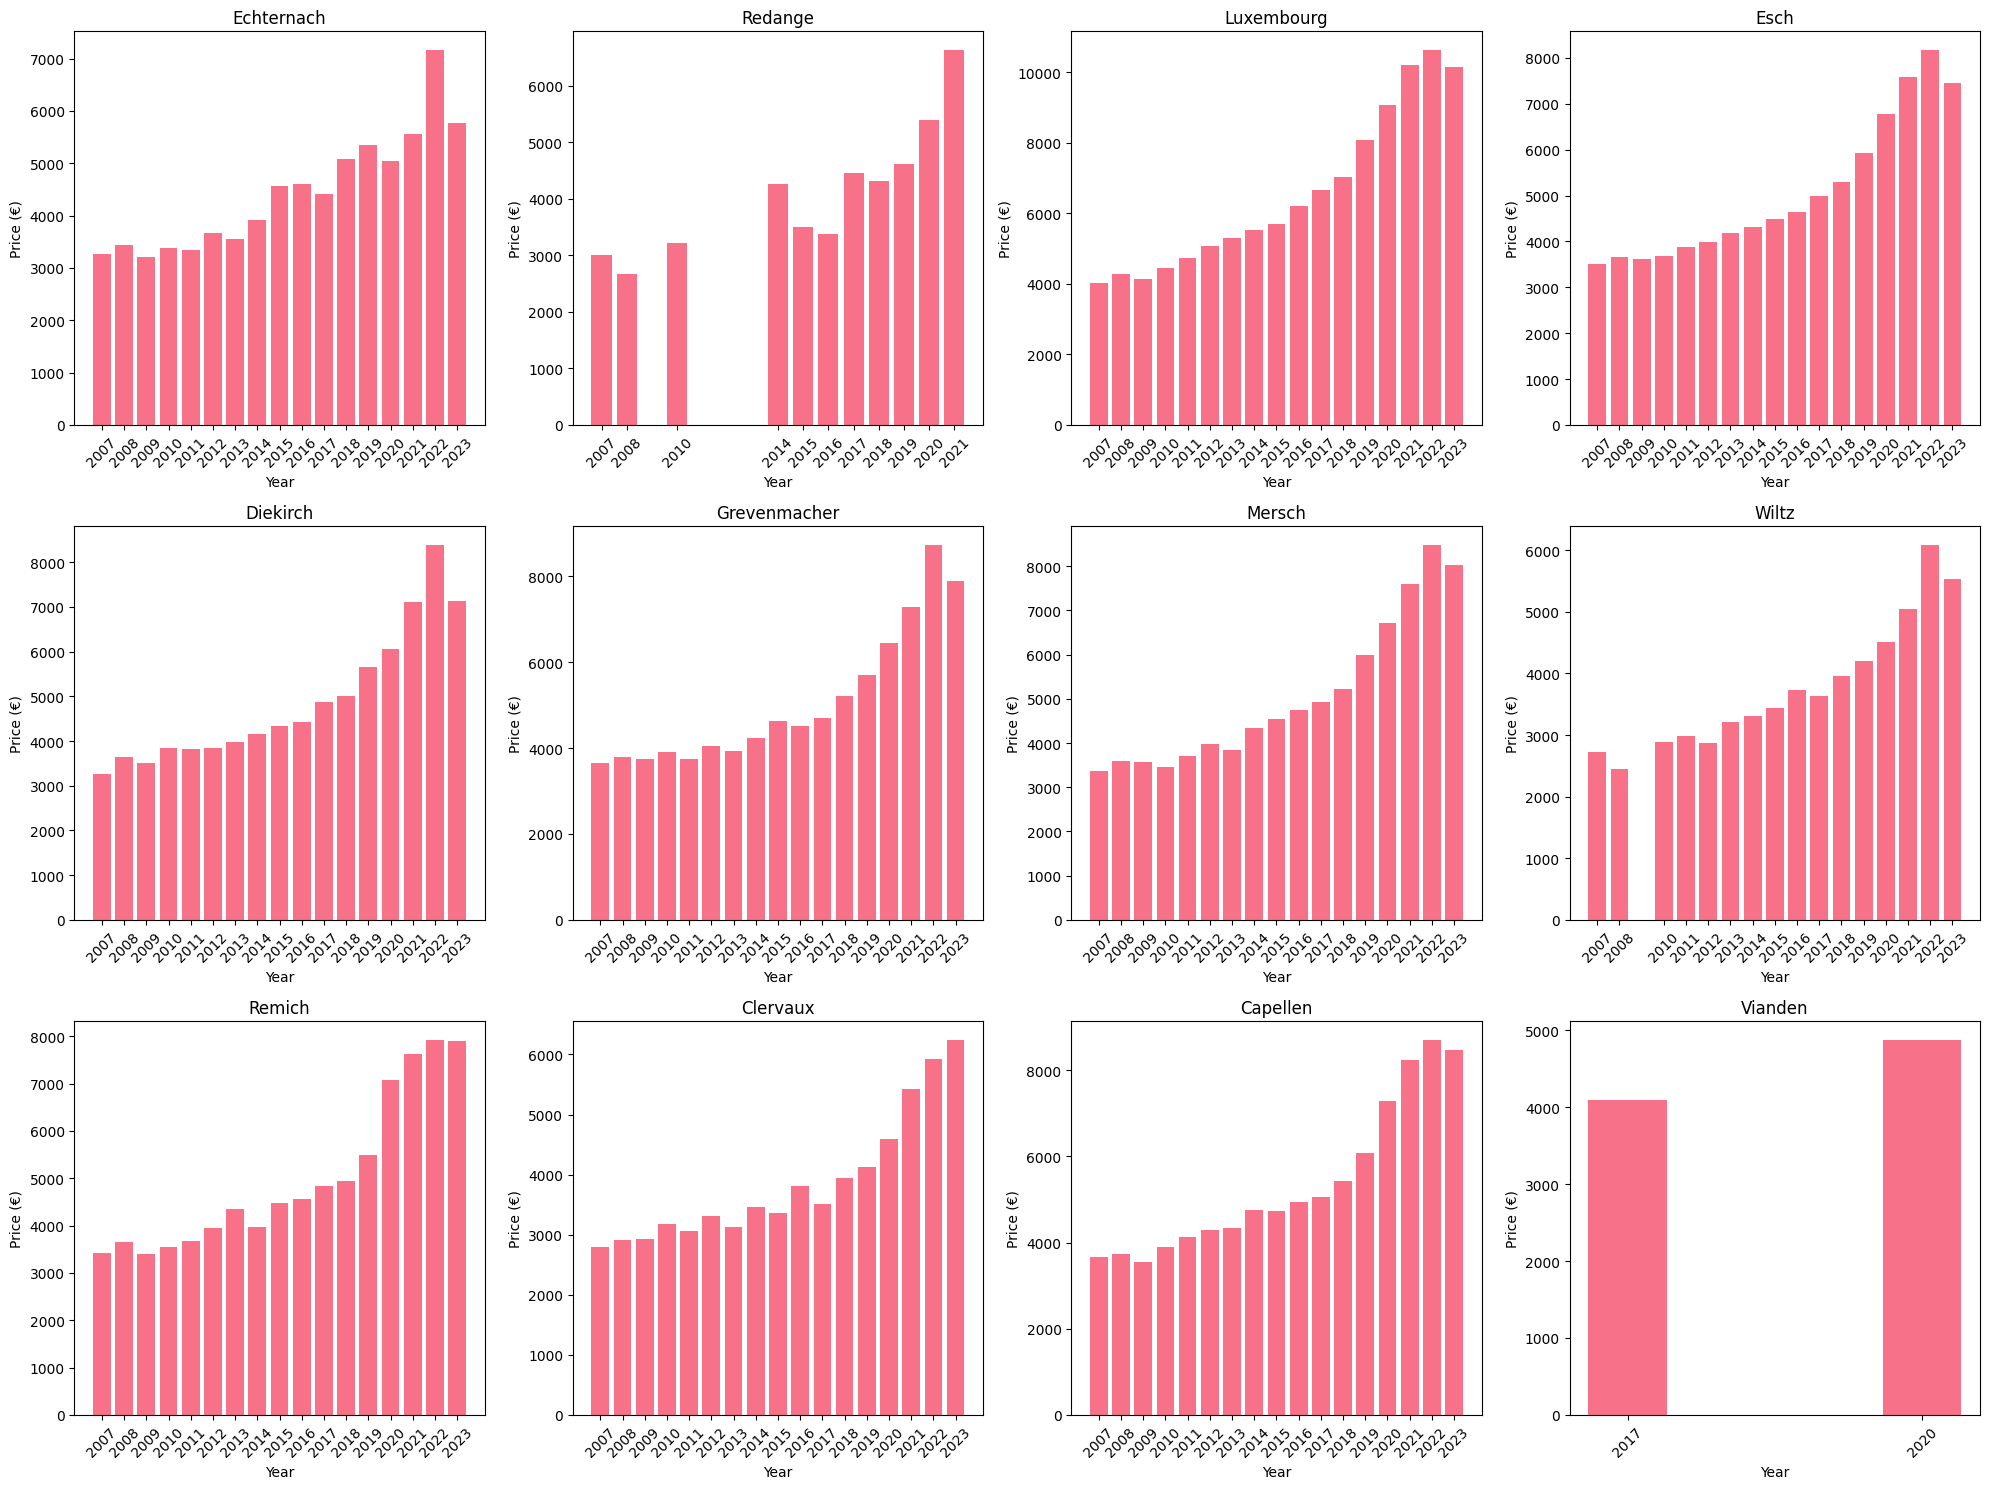

In [44]:
# Plot the average cost of a house grouped by canton per year but in separate bar plots for each canton
fig, ax = plt.subplots(3, 4, figsize=(20, 15))
ax = ax.flatten()

for i, canton in enumerate(prices_df["Canton"].unique()):
    canton_prices = prices_df[prices_df["Canton"] == canton]

    years = []
    cost = []

    for year in sorted(canton_prices["Year"].unique()):
        year_prices = canton_prices[canton_prices["Year"] == year]
        average_prices = []
        for row in year_prices["Average price per m^2"]:
            if row != "*":
                average_prices.append(float(row))
        for row in year_prices["Average Unfinished Houses Price per m^2"]:
            if row != "*":
                average_prices.append(float(row))
        if average_prices:
            years.append(year)
            cost.append(np.mean(average_prices))

    ax[i].bar(years, cost)
    ax[i].set_title(canton)
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Price (€)")
    ax[i].set_xticks(years)
    ax[i].set_xticklabels(years, rotation=45)

plt.tight_layout()
plt.show()

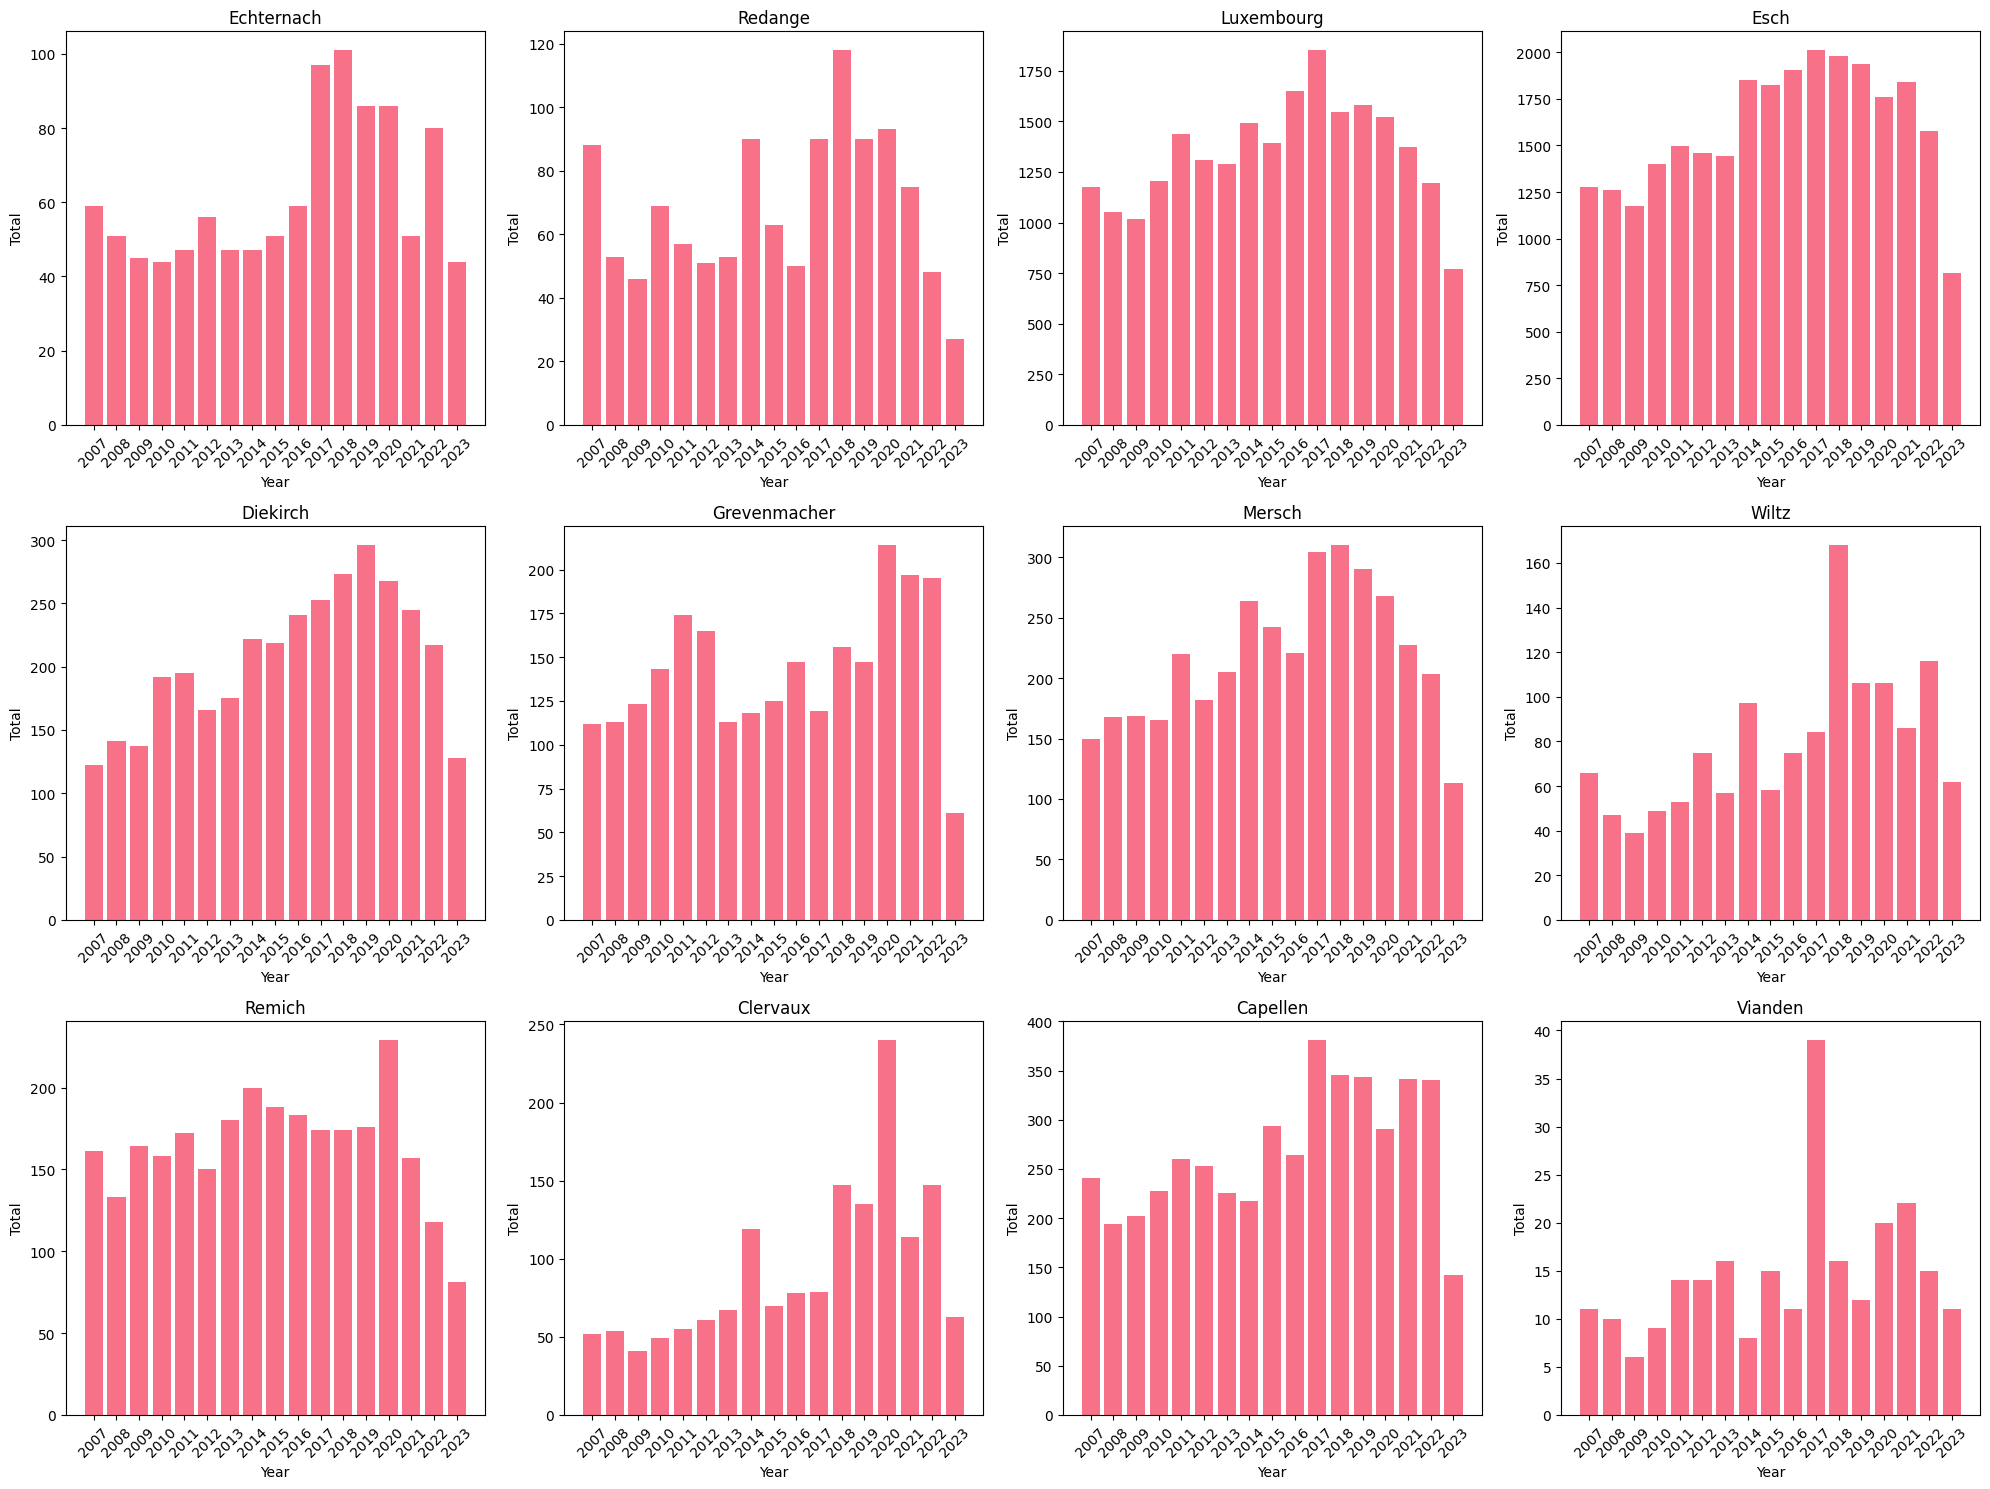

In [45]:
# Plot the numbers of houses sold per year but in separate bar plots for each canton
fig, ax = plt.subplots(3, 4, figsize=(20, 15))
ax = ax.flatten()

for i, canton in enumerate(prices_df["Canton"].unique()):
    canton_totals = prices_df[prices_df["Canton"] == canton]

    years = []
    total = []

    for year in sorted(canton_totals["Year"].unique()):
        year_prices = canton_totals[canton_totals["Year"] == year]
        year_totals = year_prices["Finished Houses Sold"].sum() + year_prices["Unfinished Houses Sold"].sum()
        if year_totals > 0:
            years.append(year)
            total.append(year_totals)

    ax[i].bar(years, total)
    ax[i].set_title(canton)
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Total")
    ax[i].set_xticks(years)
    ax[i].set_xticklabels(years, rotation=45)

plt.tight_layout()
plt.show()